<a href="https://colab.research.google.com/github/Kweku21/gender_prediction/blob/master/male_female_transfer_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-gpu

In [ ]:
pip install Keras==2.3.1

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = tf.keras.models.load_model("/content/drive/My Drive/Dataset/Male_Female/Model/model_14-0.97.h5")

In [ ]:
CATEGORIES = ["Female","Male"]

In [ ]:
def prepare(filepath):
    IMG_SIZE = 300
    img_array = cv2.imread(filepath)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

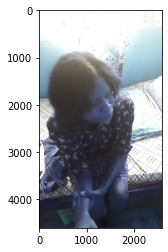

[[9.9911076e-01 8.8921370e-04]]
Female


In [ ]:
prediction = model.predict([prepare('/content/drive/My Drive/Dataset/Male_Female/test/test_19.jpg')])
print(prediction)
# prediction = int(prediction[0][0])
print(CATEGORIES[np.argmax(prediction[0], axis=-1)])

Predicted shape (1, 2)
Maximum Probability:  0.9565088
[0.0434912 0.9565088]
Classified: Male


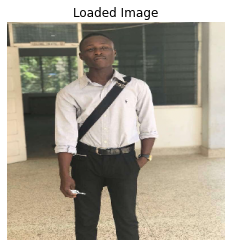

In [ ]:
from tensorflow.keras.preprocessing import image

labels = {0: 'Female', 1: 'Male'}

img_path = '/content/drive/My Drive/Dataset/Male_Female/test/test_1.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

# print(p)

print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print(p[0])
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

FEMALE : 2.62 %
MALE : 97.38 %


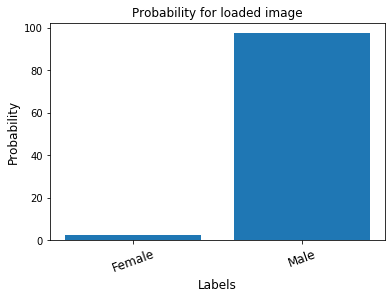

In [ ]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (prediction[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()